# Matplotlib

### Documentation

[Pyplot - plt](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Preparing Data for Matplotlib

You are given the following ordered list of points. In that form, they cannot be visualized with `pyplot`.

The goal is to **convert** the data in order for it to be usable by `pyplot`.

You should convert the list of `dict` to a list of lists or a DataFrame to plot it.

❓ Convert the data and use `pyplot.plot()` to create a line plot.

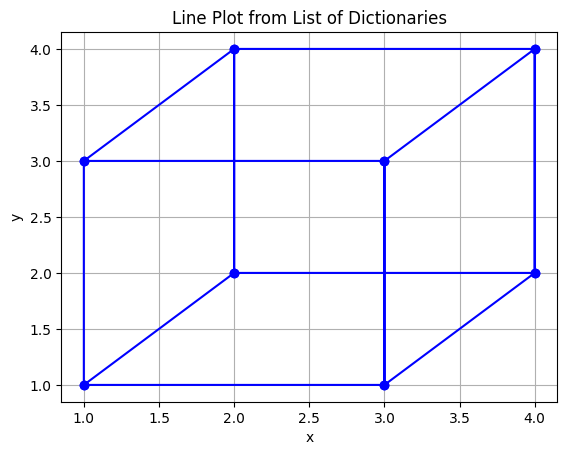

In [2]:
points = [
    {"x": 1, "y": 1},
    {"x": 2, "y": 2},
    {"x": 4, "y": 2},
    {"x": 3, "y": 1},
    {"x": 1, "y": 1},
    {"x": 1, "y": 3},
    {"x": 3, "y": 3},
    {"x": 3, "y": 1},
    {"x": 3, "y": 3},
    {"x": 4, "y": 4},
    {"x": 4, "y": 2},
    {"x": 4, "y": 4},
    {"x": 2, "y": 4},
    {"x": 2, "y": 2},
    {"x": 2, "y": 4},
    {"x": 1, "y": 3},
]

# Extracting x and y values from the list of dictionaries
x_values = [point['x'] for point in points]
y_values = [point['y'] for point in points]

# Plotting
plt.plot(x_values, y_values, '-o', color='blue')  # '-o' ensures that points are also marked on the line
plt.xlabel('x')
plt.ylabel('y')
plt.title('Line Plot from List of Dictionaries')
plt.grid(True)
plt.show()

❓ This time, create a `numpy` array of shape (100, 2), populated with random values. Then use `pyplot.scatter()` to plot these 100 points in a figure

<br/>

<details>
  <summary>💡Hint</summary>
  <p>Remember that NumPy 2D-arrays can be conveniently accessed with <code>my_array[row_slicer, col_slicer]</code></p>
</details>

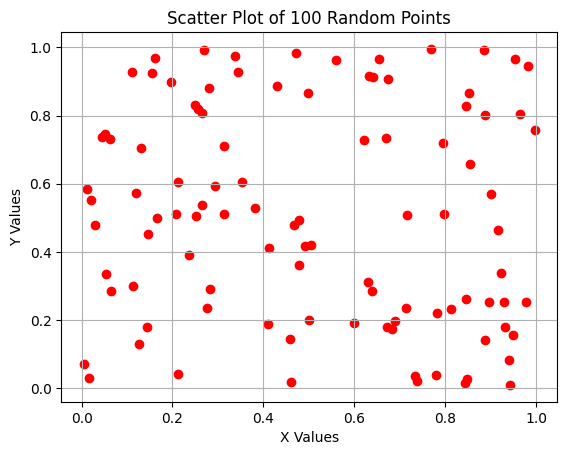

In [3]:
# Create a numpy array of shape (100, 2) with random values between 0 and 1
data = np.random.rand(100, 2)

# Extracting x and y coordinates
x_values = data[:, 0]  # All rows, first column
y_values = data[:, 1]  # All rows, second column

# Plotting
plt.scatter(x_values, y_values, color='red')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Scatter Plot of 100 Random Points')
plt.grid(True)
plt.show()

### Plotting a Function

❓ Generate data points within the range `[-10,10]`. These points are your `x` points. Use them to plot the following function:

$$y = 4x + 2$$


Use [ plt.ylim](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html#matplotlib.pyplot.ylim) to keep the **y-axis** between **-10 and 10**

<br/>

<details>
  <summary>💡Hint</summary>
      <p>You can use <code><a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html">numpy.arange()</a></code> to generate a list of N numbers in a range</p>
</details>

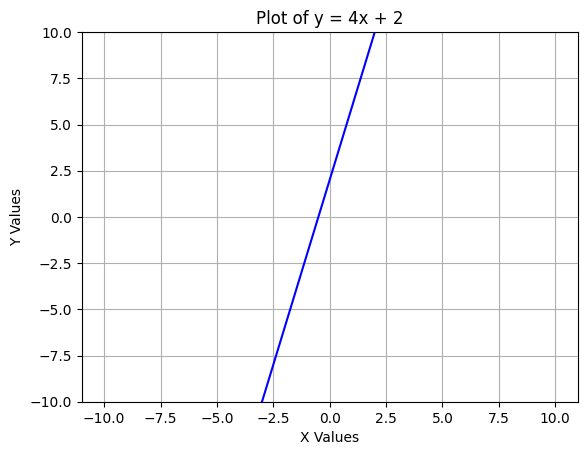

In [4]:
# Generate x-values within the range [-10, 10]
x_values = np.arange(-10, 10.1, 0.1)  # The 0.1 step size ensures that 10 is included

# Compute y-values based on the given function
y_values = 4 * x_values + 2

# Plotting
plt.plot(x_values, y_values, color='blue')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Plot of y = 4x + 2')
plt.ylim(-10, 10)  # Adjusting y-axis limits
plt.grid(True)
plt.show()

❓ Plot these 4 functions on the same graph, using the same set of `x` points generated above, keeping the **y-axis** between **-2 and 6** and the **x-axis** between **-4 and 4**.  

$$y1 = x^2$$

$$y2 = \log x$$

$$y3 = e^x$$

$$y4 = \frac{e^x}{e^x + 1}$$

<details>
  <summary>💡Hints</summary>
    
There are multiple ways to do this... to name a few:
- Use a `for` loop/list comprehension
- Use Numpy vectorial functions (e.g. `np.exp(your_list_of_x_numbers)`
- Use the Python built-in function [`map`](https://www.w3schools.com/python/ref_func_map.asp)

</details>

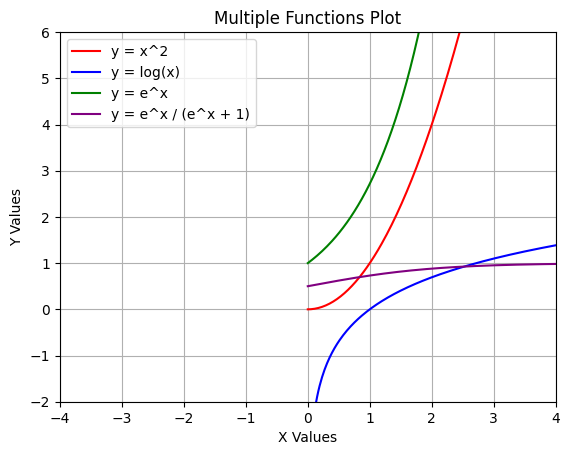

In [6]:
# Generate x-values
x_values = np.linspace(-4, 4, 400)  # Using linspace to get finer resolution

# Avoid non-positive values for logarithm, setting a small positive value instead
x_values[x_values <= 0] = 1e-10

# Compute y-values for each function
y1 = x_values**2
y2 = np.log(x_values)
y3 = np.exp(x_values)
y4 = np.exp(x_values) / (np.exp(x_values) + 1)

# Plotting
plt.plot(x_values, y1, label='y = x^2', color='red')
plt.plot(x_values, y2, label='y = log(x)', color='blue')
plt.plot(x_values, y3, label='y = e^x', color='green')
plt.plot(x_values, y4, label='y = e^x / (e^x + 1)', color='purple')

# Setting axis limits
plt.xlim(-4, 4)
plt.ylim(-2, 6)

# Adding labels, title, legend, and grid
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Multiple Functions Plot')
plt.legend()
plt.grid(True)
plt.show()

### Formatting Basics

We have a **scatter plot** generated below with `sklearn`, a library you will learn soon! We want to draw a **straight red dotted line** that follows the dots' distribution as closely as possible and make the chart look good 🖌️

Our final result should look like this:  
<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/02-Data-Toolkit/03-Data-Visualization/020302-regression-line-example.png" alt="regression_line" width=400>

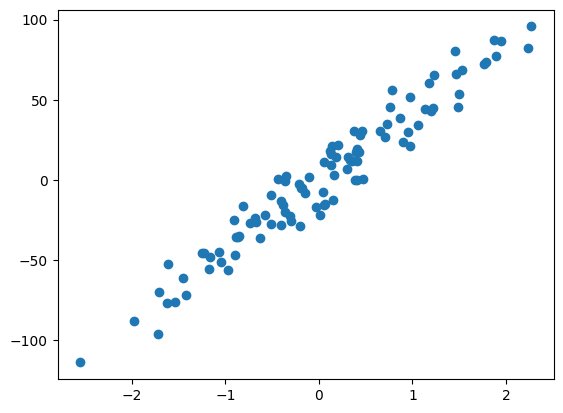

In [7]:
from sklearn import datasets

x, y, _ = datasets.make_regression(n_samples=100, n_features=1, noise=10, coef=True, random_state=0)

plt.scatter(x,y);

❓ Using your eyes only, plot a dotted red line **approximately** regressing the scatter plot above   
- Reuse `x` and `y` from the previous cell
- Two points are enough to draw a line

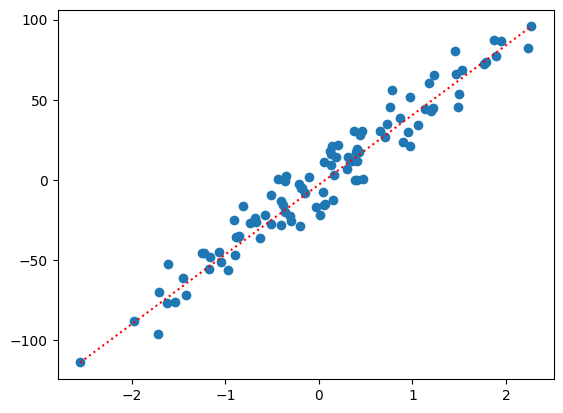

In [15]:
# Scatter the data
plt.scatter(x, y)

# Eyeballing an approximate regression line
# Since two points are enough to draw a line, we can use the min and max of x as our two x-values
# and then just provide what we estimate to be the corresponding y-values based on the scatter plot
plt.plot([x.min(), x.max()], [y.min(), y.max()],  linestyle=':', color='red')
plt.show()

❓ Now let's add some context to our graph by adding:
1. A title saying "Linear Regression"
1. A legend describing the data points and the line
1. Labels for the x-axis ("input value") and the y-axis ("output value")

🏆 Bonus: copy-paste the line below and try to understand the syntax (use shift-tab to show the docs)
```python
plt.annotate("Regression line", (0,0), (1,-50), arrowprops={"arrowstyle":"->"})
```

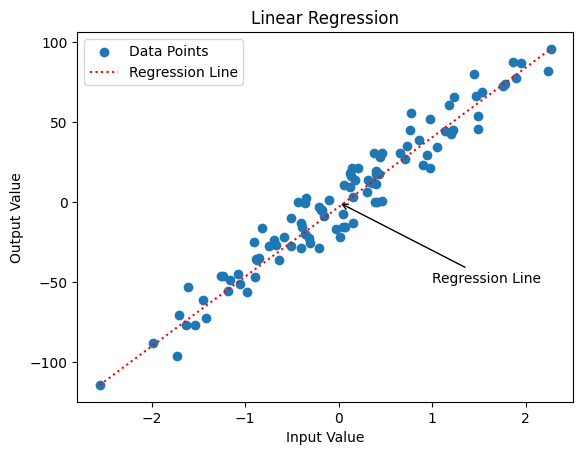

In [17]:
# Scatter the data and label it for the legend
plt.scatter(x, y, label='Data Points')

# Plot the approximate regression line
plt.plot([x.min(), x.max()], [y.min(), y.max()], linestyle=':', color='red', label='Regression Line')

# Add title
plt.title("Linear Regression")

# Add x and y axis labels
plt.xlabel("Input Value")
plt.ylabel("Output Value")

# Add the legend
plt.legend()

# Annotate the graph with an arrow pointing to the origin and text
# This function is used to add a note with an arrow. The note "Regression line" is positioned at (0,0),
# but the text itself starts at (1,-50). The arrow points from the text to the note.
plt.annotate("Regression Line", (0, 0), (1, -50), arrowprops={"arrowstyle": "->"})
plt.show()

Let's continue to work on our plot's design.

❓ Make the plot **15 inches wide** and **6 inches tall**. 

What you have to do is:
1. Access the current figure object of the plot
1. Set the size of the figure


These documentation pages should be useful:
1. [plt.gcf( )](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gcf.html#matplotlib.pyplot.gcf)
1. [fig.set_figheight( )](https://matplotlib.org/stable/api/figure_api.html?highlight=set_figheight#matplotlib.figure.Figure.set_figheight)

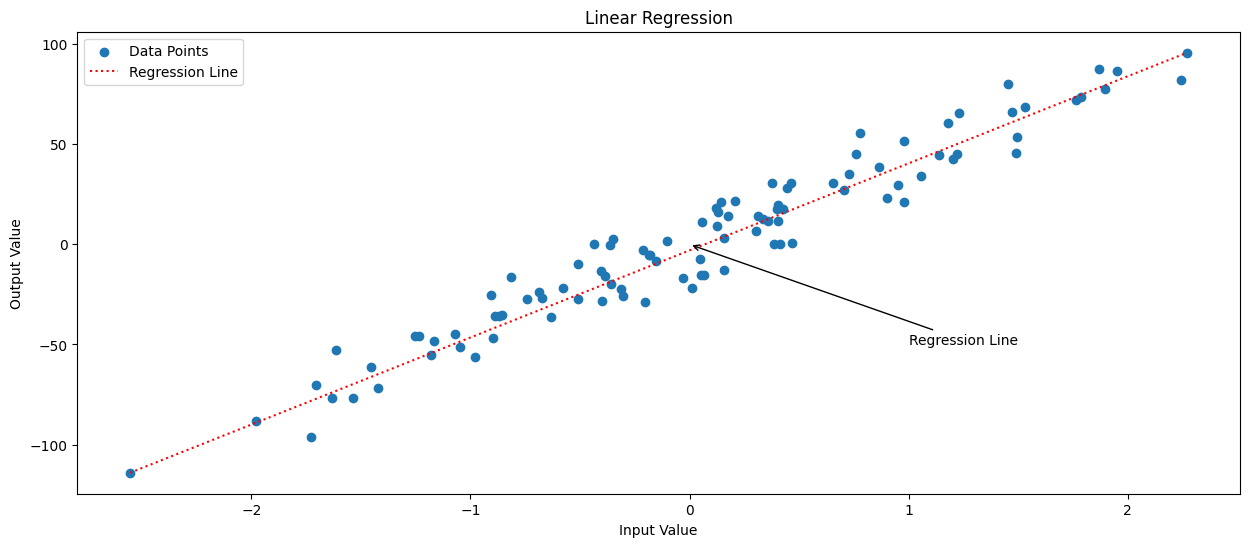

In [19]:
# Scatter the data and label it for the legend
plt.scatter(x, y, label='Data Points')

# Plot the approximate regression line
plt.plot([x.min(), x.max()], [y.min(), y.max()], linestyle=':', color='red', label='Regression Line')

# Add title
plt.title("Linear Regression")

# Add x and y axis labels
plt.xlabel("Input Value")
plt.ylabel("Output Value")

# Add the legend
plt.legend()

# Annotate the graph with an arrow pointing to the origin and text
plt.annotate("Regression Line", (0, 0), (1, -50), arrowprops={"arrowstyle": "->"})

# Get the current figure object
fig = plt.gcf()

# Set the width and height of the figure
fig.set_figwidth(15)
fig.set_figheight(6)
plt.show()